In [1]:
# https://www.analyticsvidhya.com/blog/2019/08/5-applications-singular-value-decomposition-svd-data-science/

(425, 425) (425,) (640, 640)


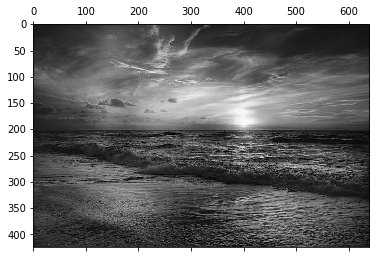

In [2]:
# get the image from "https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


# S modificate
import urllib
#req = urllib.urlopen('https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg')
#arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
#img = cv2.imdecode(arr, -1) # 'Load it as it is'

from skimage import io    
#img = io.imread("https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg")
#img = io.imread("https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg")
#https://art-assorty.ru/wp-content/uploads/2018/09/beach-2179624_640.jpg
urllib.request.urlretrieve("https://art-assorty.ru/wp-content/uploads/2018/09/beach-2179624_640.jpg", "beach-2179624_640.jpg")
##############

# read image in grayscale
img = cv2.imread('beach-2179624_640.jpg', 0)
#img = cv2.imread(img, 0)

# obtain svd
U, S, V = np.linalg.svd(img)

# inspect shapes of the matrices
print(U.shape, S.shape, V.shape)

# plot images with different number of components
comps = [638, 100, 50, 10, 5, 1]
plt.matshow(img, cmap = 'gray')



In [3]:
%%script false
# The code of this cell does not work. It fails. Shape mismatch. 
# The fixed version is provided in later cells. 
plt.figure(figsize = (16, 8))
for i in range(6):
    low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
    if(i  == 0):
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
    else:
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

In [4]:
U[:, :comps[0]].shape

(425, 425)

In [5]:
S[:comps[0]].shape

(425,)

In [6]:
V[:comps[0], :].shape

(638, 640)

In [7]:
V[:comps[1], :][0:425,0:425][:5, :5][:10, :10]

array([[-0.01916998, -0.01930776, -0.01957592, -0.01991198, -0.02022384],
       [ 0.04035349,  0.04048398,  0.04134931,  0.0425904 ,  0.04335798],
       [ 0.01712882,  0.01713363,  0.01653474,  0.01566584,  0.0158209 ],
       [-0.01468786, -0.01653306, -0.01755257, -0.01734174, -0.01761349],
       [ 0.01366705,  0.01347261,  0.01336835,  0.01338333,  0.01198977]])

In [8]:
# np.diag(S[:comps[0]]) @ V[:comps[0], :]

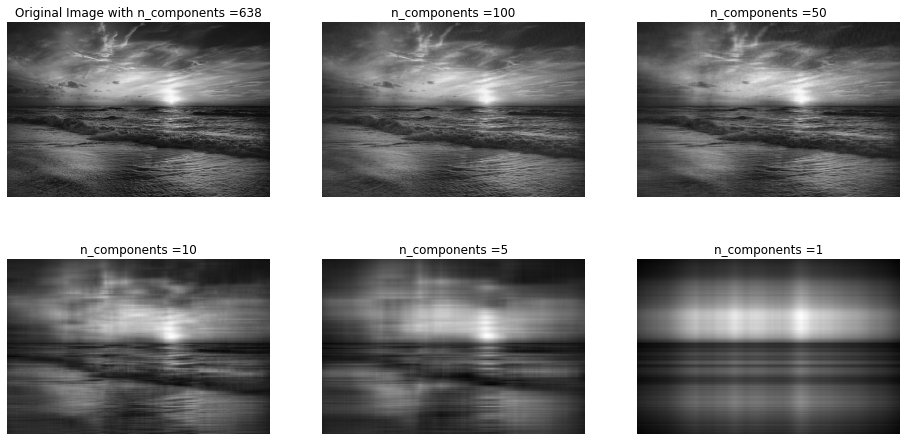

In [9]:
plt.figure(figsize = (16, 8))
for i in range(6):
# for i in range(1, 6):
    
    # low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]])
     #[0:425,0:425]
    # Think more about the above hardcoded fix.
    if(i  == 0):
        low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :][0:425,:] #[0:425,0:425]
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
    else:
        low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))